In [1]:
%matplotlib inline
from sklearn.datasets import load_digits
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.cross_validation import KFold
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

C:\Users\Justin\Anaconda3\envs\virtualbox\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
#save data to variables
digits_bunch=load_digits()
data=digits_bunch.data
target=digits_bunch.target

In [3]:
#explore data format
print(type(digits_bunch))
print(type(data))
print(data.shape)

<class 'sklearn.utils.Bunch'>
<class 'numpy.ndarray'>
(1797, 64)


In [4]:
datadf=pd.DataFrame(data)
datadf.head(3)

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0


In [5]:
#Test code - reshaping a row of pixel values

first_image=datadf.iloc[300]
#first_image=first_image.drop(columns='label', axis=1)
np_image=first_image.values
print('before reshape:', np_image.shape, '\n')
print('before reshape:', '\n', np_image,'\n')

np_image=np_image.reshape(8,8)
print('after reshape:', np_image.shape, '\n')
print('after reshape:', '\n', np_image)

before reshape: (64,) 

before reshape: 
 [  0.   0.   1.  11.  16.  16.  10.   0.   0.   0.  13.  14.   8.  12.  11.
   0.   0.   0.   4.   0.   0.  13.   4.   0.   0.   0.   0.   0.   3.  15.
   0.   0.   0.   0.   2.  15.  16.  16.   9.   0.   0.   0.   3.  13.  16.
   8.   1.   0.   0.   0.   0.   7.  10.   0.   0.   0.   0.   0.   0.  13.
   3.   0.   0.   0.] 

after reshape: (8, 8) 

after reshape: 
 [[  0.   0.   1.  11.  16.  16.  10.   0.]
 [  0.   0.  13.  14.   8.  12.  11.   0.]
 [  0.   0.   4.   0.   0.  13.   4.   0.]
 [  0.   0.   0.   0.   3.  15.   0.   0.]
 [  0.   0.   2.  15.  16.  16.   9.   0.]
 [  0.   0.   3.  13.  16.   8.   1.   0.]
 [  0.   0.   0.   7.  10.   0.   0.   0.]
 [  0.   0.   0.  13.   3.   0.   0.   0.]]


In [6]:
sqim=[]
for row in [0,100,200,300,1000,1100,1200,1300]:
    #get image in row as series and convert series to np.ndarray with .values
    image=datadf.iloc[row]
    image=image.values
    #reshape image
    image=image.reshape(8,8)
    sqim.append(image)

In [7]:
#these are the targets/labels we should see in the plots
for row in [0,100,200,300,1000,1100,1200,1300]:
    print(target[row])

0
4
1
7
1
9
7
3


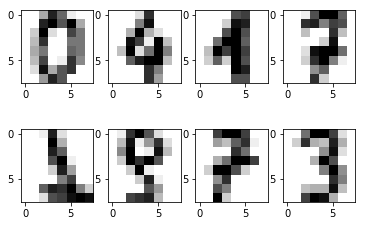

In [8]:
# 2 rows X 4 columns of charts. 8 total.
# there is a way to loop plotting using enumerate
fig = plt.figure()
ax1=fig.add_subplot(2,4,1)
ax2=fig.add_subplot(2,4,2)
ax3=fig.add_subplot(2,4,3)
ax4=fig.add_subplot(2,4,4)
ax5=fig.add_subplot(2,4,5)
ax6=fig.add_subplot(2,4,6)
ax7=fig.add_subplot(2,4,7)
ax8=fig.add_subplot(2,4,8)

ax1.imshow(sqim[0], cmap='gray_r')
ax2.imshow(sqim[1], cmap='gray_r')
ax3.imshow(sqim[2], cmap='gray_r')
ax4.imshow(sqim[3], cmap='gray_r')
ax5.imshow(sqim[4], cmap='gray_r')
ax6.imshow(sqim[5], cmap='gray_r')
ax7.imshow(sqim[6], cmap='gray_r')
ax8.imshow(sqim[7], cmap='gray_r')

plt.show()

In [9]:
#add targets (labels) to datadf
datadf['target']=target

In [18]:
%%time
#one hidden layer of neurons
fiftypct=int(len(datadf)*0.5)
train=datadf.iloc[:fiftypct]
test=datadf.iloc[fiftypct:]

train_x=train.iloc[:,0:64]  #64 is exclusive, target col excluded
train_y=train.iloc[:,64]
test_x=test.iloc[:,0:64]
test_y=test.iloc[:,64]

#Neural network pipeline - data, test, errors

for neuron in [8,16,32,64,128,256]:
    mlp=MLPClassifier(hidden_layer_sizes=(neuron,), activation='relu')
    mlp.fit(train_x,train_y)
    train_pred=mlp.predict(train_x)
    test_pred=mlp.predict(test_x)
    train_acc=accuracy_score(train_y, train_pred)
    test_acc=accuracy_score(test_y, test_pred)
    print('train_pred. ', neuron,' neurons.', 'Accuracy:', round(train_acc,3))
    print(' test_pred. ', neuron,' neurons.', 'Accuracy:', round(test_acc,3))


train_pred.  8  neurons. Accuracy: 0.679
 test_pred.  8  neurons. Accuracy: 0.659
train_pred.  16  neurons. Accuracy: 0.991
 test_pred.  16  neurons. Accuracy: 0.897
train_pred.  32  neurons. Accuracy: 1.0
 test_pred.  32  neurons. Accuracy: 0.938
train_pred.  64  neurons. Accuracy: 1.0
 test_pred.  64  neurons. Accuracy: 0.928
train_pred.  128  neurons. Accuracy: 1.0
 test_pred.  128  neurons. Accuracy: 0.932
train_pred.  256  neurons. Accuracy: 1.0
 test_pred.  256  neurons. Accuracy: 0.94
Wall time: 2.58 s


In [19]:
#Accuracy continues to increase in test with increasing number
#of neurons.  The predictions improve with more neurons, so overfitting
#isn't happening.

In [22]:
%%timeit -n 3
#2 hidden layers of neurons
#model slow for 128 neurons/layer
fiftypct=int(len(datadf)*0.5)
train=datadf.iloc[:fiftypct]
test=datadf.iloc[fiftypct:]

train_x=train.iloc[:,0:64]  #64 is exclusive, target col excluded
train_y=train.iloc[:,64]
test_x=test.iloc[:,0:64]
test_y=test.iloc[:,64]

#Neural network pipeline - data, test, errors

for neuron in [64,128]:
    mlp=MLPClassifier(hidden_layer_sizes=(neuron, neuron), activation='relu')
    mlp.fit(train_x,train_y)
    train_pred=mlp.predict(train_x)
    test_pred=mlp.predict(test_x)
    train_acc=accuracy_score(train_y, train_pred)
    test_acc=accuracy_score(test_y, test_pred)
    print('train_pred. ', neuron,' neurons.', 'Accuracy:', round(train_acc,3))
    print(' test_pred. ', neuron,' neurons.', 'Accuracy:', round(test_acc,3))


train_pred.  64  neurons. Accuracy: 1.0
 test_pred.  64  neurons. Accuracy: 0.932
train_pred.  128  neurons. Accuracy: 1.0
 test_pred.  128  neurons. Accuracy: 0.938
train_pred.  64  neurons. Accuracy: 1.0
 test_pred.  64  neurons. Accuracy: 0.921
train_pred.  128  neurons. Accuracy: 1.0
 test_pred.  128  neurons. Accuracy: 0.939
train_pred.  64  neurons. Accuracy: 1.0
 test_pred.  64  neurons. Accuracy: 0.943
train_pred.  128  neurons. Accuracy: 1.0
 test_pred.  128  neurons. Accuracy: 0.948
train_pred.  64  neurons. Accuracy: 1.0
 test_pred.  64  neurons. Accuracy: 0.938
train_pred.  128  neurons. Accuracy: 1.0
 test_pred.  128  neurons. Accuracy: 0.951
train_pred.  64  neurons. Accuracy: 1.0
 test_pred.  64  neurons. Accuracy: 0.93
train_pred.  128  neurons. Accuracy: 1.0
 test_pred.  128  neurons. Accuracy: 0.942
train_pred.  64  neurons. Accuracy: 1.0
 test_pred.  64  neurons. Accuracy: 0.915
train_pred.  128  neurons. Accuracy: 1.0
 test_pred.  128  neurons. Accuracy: 0.934
train

In [13]:
#Performance improves with more neurons, so no overfit.

In [14]:
datadf.shape
#datadf=datadf.drop([1794,1795,1796])
datadf.tail()
datadf.shape

(1797, 65)

In [15]:
# Neural network training pipeline with KFold cross-validation, cv
X=np.array(datadf.iloc[:,0:64])
Y=np.array(datadf.iloc[:,64])
elementcnt=int(len(datadf))

big_accuracy=[]
holdout_accuracy=[]

#put KFold cross-validation in function:
def cv(element_count, numb_folds):
    kf=KFold(elementcnt, n_folds=6, shuffle=False)             
    for train_index, test_index in kf:
        X_big, X_holdout = X[train_index], X[test_index]  
        Y_big, Y_holdout = Y[train_index], Y[test_index]
        mlp.fit(X_big, Y_big)  #train has same dimen.; test has same dimen.
        big_pred=mlp.predict(X_big)
        holdout_pred=mlp.predict(X_holdout)
        big_acc=accuracy_score(Y_big, big_pred)
        hout_acc=accuracy_score(Y_holdout, holdout_pred)
        big_accuracy.append(big_acc)
        holdout_accuracy.append(hout_acc)
    big_avg=np.mean(big_accuracy)
    holdout_avg=np.mean(holdout_accuracy)
    return(big_avg, holdout_avg)

#instantiate model, cross-validation, and print score
for neuron in [10, 64, 128]:
    mlp=MLPClassifier(hidden_layer_sizes=(neuron, neuron, neuron), activation='relu')
    big_avg, holdout_avg=cv(elementcnt, 6)    
    print('neurons: ',neuron)
    print(big_avg, holdout_avg)    

neurons:  10
0.990760708481 0.897623560015
neurons:  64
0.995380354241 0.91959959123
neurons:  128
0.99692023616 0.930447788926


In [16]:
#KFold model holdout accuracy improves with more neurons.
#Don't see overfitting.

In [17]:
#Compact model using depreciated cross_val_score
#THIS RUNS A LONG TIME without graphics card

#Model cross-validation using KFold
#Instantiate model, instantiate KFold, use cross_val_score()
#to return the model score metric.
X=np.array(datadf.iloc[:,0:64])
Y=np.array(datadf.iloc[:,64])
elementcnt=int(len(datadf))  #total number of elements for KFold instantiation
avgscore_3models=[]

for neuron in [10, 64, 128]:
    mlp=MLPClassifier(hidden_layer_sizes=(neuron, neuron, neuron), activation='relu')
    kf=KFold(elementcnt, n_folds=6, shuffle=False)
    score=cross_val_score(mlp, X, Y, cv=kf)
    avgscore=np.mean(score)
    avgscore_3models.append(avgscore)
print(avgscore_3models)

[0.90764771460423621, 0.95438312894834632, 0.95438312894834632]
